In [1]:
from utils import load_api_key
API_KEY = load_api_key()

In [2]:
#!pip install matplotlib -q

# Objetivo: Implementar una tool

In [3]:
from langchain_core.tools import tool

@tool
def multiplicar_numeros(num1: int, num2: int) -> int:
    """
    Multiplies two integers and returns the result.

    Args:
        num1 (int): The first integer.
        num2 (int): The second integer.

    Returns:
        int: The result of multiplying num1 and num2.
    """
    return num1 * num2

@tool
def create_bar_plot(x_labels: list[str], heights: list[int | float], title: str = "Bar Plot", x_label: str = "Categories", y_label: str = "Values") -> None:
    """
    Creates a bar plot using the given data.

    Args:
        x_labels (list[str]): The labels for the x-axis.
        heights (list[int | float]): The heights of the bars.
        title (str, optional): The title of the plot. Defaults to "Bar Plot".
        x_label (str, optional): The label for the x-axis. Defaults to "Categories".
        y_label (str, optional): The label for the y-axis. Defaults to "Values".
    """
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, heights)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [5]:
!pip install loguru


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [21]:
from langchain_core.messages import HumanMessage, SystemMessage

class personalChatModel:
    def __init__(self, llm, tools):
        self.llm = llm.bind_tools([t for t in tools.values()])
        self.tools = tools
        self.messages = []


    def save_message_to_memory(self, message):
        if isinstance(message, str):
            message = HumanMessage(message)
        self.messages.append(message)


    def ask(self, question):
        self.save_message_to_memory(question)

        ai_msg = self.llm.invoke(self.messages)
        self.messages.append(ai_msg)

        if not ai_msg.tool_calls:
            return ai_msg.content
        print(ai_msg.pretty_print())
        
        for tool_call in ai_msg.tool_calls:
            tool_msg = self.tools[tool_call["name"]].invoke(tool_call)
            print(tool_msg.pretty_print())
            self.messages.append(tool_msg)
        
        ai_msg = self.llm.invoke(self.messages)
        print(ai_msg.pretty_print())
        self.messages.append(ai_msg)
        return ai_msg.content

In [22]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", api_key=API_KEY)
tools = {"multiplicar_numeros": multiplicar_numeros, "create_bar_plot": create_bar_plot}
chat_tool = personalChatModel(llm, tools)

In [24]:
chat_tool.ask("Donde está Santiago de Compostela?")

'Santiago de Compostela es la capital de la comunidad autónoma de Galicia, en el noroeste de España. Es conocida por ser un importante lugar de peregrinación, ya que alberga la catedral donde se cree que están los restos del apóstol Santiago. La ciudad tiene un rico patrimonio histórico y cultural y es famosa por su casco antiguo, que ha sido declarado Patrimonio de la Humanidad por la UNESCO. Si necesitas más información sobre Santiago de Compostela, no dudes en preguntar.'

================================== Ai Message ==================================
Tool Calls:
  create_bar_plot (call_g0nJ8sdKZ1151lv7Em9hm4E7)
 Call ID: call_g0nJ8sdKZ1151lv7Em9hm4E7
  Args:
    x_labels: ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
    heights: [57.91, 108.2, 149.6, 227.9, 778.5, 1427, 2871, 4497]
    title: Distancias de los Planetas del Sistema Solar al Sol (en millones de km)
    x_label: Planetas
    y_label: Distancia (millones de km)
None


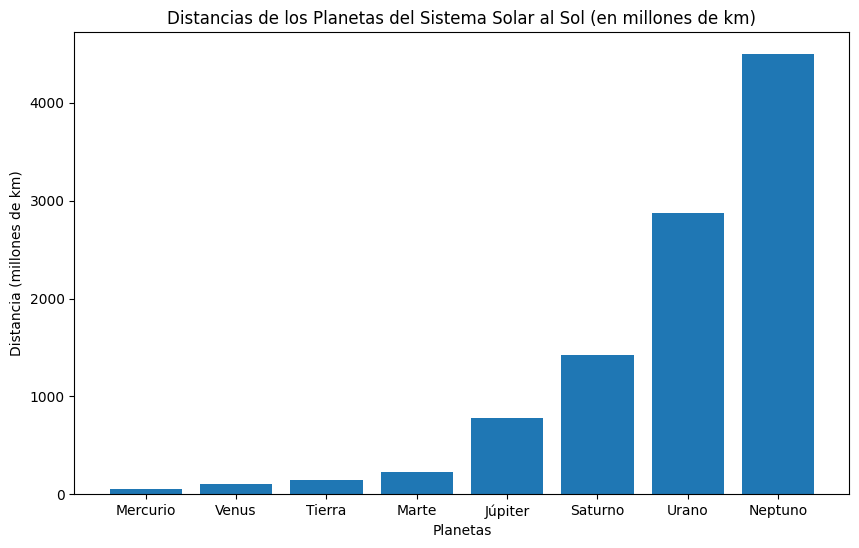

================================= Tool Message =================================
Name: create_bar_plot

null
None
================================== Ai Message ==================================

He creado un gráfico de barras que muestra las distancias de los planetas del sistema solar al Sol, en millones de kilómetros. Aquí tienes la información:

- **Mercurio**: 57.91 millones de km
- **Venus**: 108.2 millones de km
- **Tierra**: 149.6 millones de km
- **Marte**: 227.9 millones de km
- **Júpiter**: 778.5 millones de km
- **Saturno**: 1427 millones de km
- **Urano**: 2871 millones de km
- **Neptuno**: 4497 millones de km

Si deseas visualizar el gráfico o necesitas más información, házmelo saber.
None


'He creado un gráfico de barras que muestra las distancias de los planetas del sistema solar al Sol, en millones de kilómetros. Aquí tienes la información:\n\n- **Mercurio**: 57.91 millones de km\n- **Venus**: 108.2 millones de km\n- **Tierra**: 149.6 millones de km\n- **Marte**: 227.9 millones de km\n- **Júpiter**: 778.5 millones de km\n- **Saturno**: 1427 millones de km\n- **Urano**: 2871 millones de km\n- **Neptuno**: 4497 millones de km\n\nSi deseas visualizar el gráfico o necesitas más información, házmelo saber.'

In [25]:
chat_tool.ask("Crea un gráfico de barras con las distancias de los planetas del sistema solar al sol")

In [26]:
chat_tool.messages

[HumanMessage(content='Donde está Santiago?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Santiago es la capital de Chile y está ubicada en el valle central del país, rodeada de montañas. Es una de las ciudades más grandes y pobladas de Chile, y es un importante centro cultural, político y económico. Si necesitas información más específica sobre su ubicación o características, házmelo saber.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 249, 'total_tokens': 314, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-151f5f56-5bab-4999-b21c-5a0ad464a164-0', usage_metadata={'input_tokens': 249, 'output_tokens': 65, 'total